In [1]:
import pandas as pd
import numpy as np

In [2]:
csv_data = pd.read_csv('http://jtimmer.digitalspacemail17.net/data/yesterday_20201002.CSV', header = 4, encoding = "ISO-8859-1")

In [3]:
csv_data[["Parameter", "Site Name", "Avg", "Max", "Hr. of Max"]]

,Parameter,Site Name,Avg,Max,Hr. of Max
0,01 OZONE PPM,ALPINE,0.067,0.094,13.0
1,NaN,CHULA VISTA,0.040,0.088,12.0
2,NaN,DOWNTOWN SES,0.037,0.080,12.0
3,NaN,EL CAJON LES,0.044,0.089,14.0
4,NaN,ESCONDIDO,NaN,NaN,NaN
...,...,...,...,...,...
106,NaN,CHICANO PARK,1.500,2.640,9.0
107,NaN,DOWNTOWN SES,1.660,5.620,0.0
108,NaN,OCEANVIEW BLVD,1.540,2.450,20.0
109,NaN,SAN YSIDRO,3.450,9.400,0.0


In [4]:
d = csv_data[["Parameter", "Site Name", "Avg", "Max", "Hr. of Max"]]

In [145]:
d["Parameter"].fillna(method = 'ffill',inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [147]:
d[-30:]

,Parameter,Site Name,Avg,Max,Hr. of Max
81,15 SWSP MPH,OTAY MESA DVN,4.10,9.60,12.0
82,15 SWSP MPH,PENDLETON,3.20,4.90,1.0
83,16 AMBTEMP °F,ALPINE,88.20,97.90,12.0
84,16 AMBTEMP °F,CARMEL MT RCH,84.30,101.40,12.0
85,16 AMBTEMP °F,CHULA VISTA,80.30,92.10,10.0
86,16 AMBTEMP °F,DOWNTOWN SES,80.00,92.80,13.0
87,16 AMBTEMP °F,EL CAJON LES,82.40,102.30,13.0
88,16 AMBTEMP °F,ESCONDIDO,NaN,NaN,NaN
89,16 AMBTEMP °F,KEARNY MESA,84.40,99.30,12.0
90,16 AMBTEMP °F,OTAY MESA DVN,84.10,99.00,10.0


In [5]:
selected_sites = ["CHULA VISTA", "EL CAJON LES", "KEARNY MESA", "OTAY MESA DVN", "PENDLETON"]

In [148]:
features = {}
visited_sites = 0
curr_info = {}
curr_param = ""
for index, data in d.iterrows():
    if data["Parameter"] != curr_param:
        if visited_sites < 5:
            #print(curr_info)
            #print(visited_sites)
            curr_info = {}
        else:
            features[curr_param] = curr_info
        curr_param = data["Parameter"]
        visited_sites = 0
        curr_info = {}
        continue 
    if data["Site Name"] not in selected_sites:
        continue
    curr_info[data["Site Name"]] = {"Avg":data["Avg"], "Max":data["Max"]}
    visited_sites += 1
    #print(curr_info)

In [6]:
def get_features(d):
    features = {}
    visited_sites = 0
    curr_info = {}
    curr_param = ""
    for index, data in d.iterrows():
        if data["Parameter"] != curr_param:
            if visited_sites < 5:
                #print(curr_info)
                #print(visited_sites)
                curr_info = {}
            else:
                features[curr_param] = curr_info
            curr_param = data["Parameter"]
            visited_sites = 0
            curr_info = {}
            continue 
        if data["SiteName"] not in selected_sites:
            continue
        curr_info[data["SiteName"]] = {"Avg":data["Avg"], "Max":data["Max"]}
        visited_sites += 1
        #print(curr_info)
    return features

In [149]:
pd.DataFrame(features)

,01 OZONE PPM,02 NOX PPM,03 NO2 PPM,04 NO PPM,10 INTMP °C,12 VWDR °,13 SIGTHETA °,14 VWSP MPH,15 SWSP MPH,16 AMBTEMP °F
CHULA VISTA,"{'Avg': 0.04, 'Max': 0.08800000000000001}","{'Avg': 0.022000000000000002, 'Max': 0.065}","{'Avg': 0.02, 'Max': 0.040999999999999995}","{'Avg': 0.003, 'Max': 0.025}","{'Avg': 25.0, 'Max': 26.0}","{'Avg': 0.0, 'Max': 280.0}","{'Avg': 26.0, 'Max': 52.0}","{'Avg': 0.0, 'Max': 5.4}","{'Avg': 2.9, 'Max': 5.7}","{'Avg': 80.3, 'Max': 92.1}"
EL CAJON LES,"{'Avg': 0.044000000000000004, 'Max': 0.0890000...","{'Avg': 0.017, 'Max': 0.040999999999999995}","{'Avg': 0.015, 'Max': 0.027000000000000003}","{'Avg': 0.002, 'Max': 0.013999999999999999}","{'Avg': 27.0, 'Max': 27.0}","{'Avg': 0.0, 'Max': 330.0}","{'Avg': 38.0, 'Max': 59.0}","{'Avg': 0.0, 'Max': 6.1}","{'Avg': 2.2, 'Max': 6.7}","{'Avg': 82.4, 'Max': 102.3}"
KEARNY MESA,"{'Avg': 0.047, 'Max': 0.081}","{'Avg': 0.017, 'Max': 0.051}","{'Avg': 0.015, 'Max': 0.04}","{'Avg': 0.001, 'Max': 0.011000000000000001}","{'Avg': 25.0, 'Max': 25.0}","{'Avg': 0.0, 'Max': 332.0}","{'Avg': 23.0, 'Max': 69.0}","{'Avg': 0.0, 'Max': 9.0}","{'Avg': 4.2, 'Max': 9.3}","{'Avg': 84.4, 'Max': 99.3}"
OTAY MESA DVN,"{'Avg': 0.040999999999999995, 'Max': 0.077}","{'Avg': 0.026000000000000002, 'Max': 0.08}","{'Avg': 0.021, 'Max': 0.043}","{'Avg': 0.005, 'Max': 0.037000000000000005}","{'Avg': 25.0, 'Max': 26.0}","{'Avg': 0.0, 'Max': 349.0}","{'Avg': 21.0, 'Max': 41.0}","{'Avg': 0.0, 'Max': 9.4}","{'Avg': 4.1, 'Max': 9.6}","{'Avg': 84.1, 'Max': 99.0}"
PENDLETON,"{'Avg': 0.042, 'Max': 0.073}","{'Avg': 0.013999999999999999, 'Max': 0.0370000...","{'Avg': 0.013000000000000001, 'Max': 0.03}","{'Avg': 0.002, 'Max': 0.009000000000000001}","{'Avg': 25.0, 'Max': 26.0}","{'Avg': 0.0, 'Max': 282.0}","{'Avg': 20.0, 'Max': 52.0}","{'Avg': 0.0, 'Max': 4.9}","{'Avg': 3.2, 'Max': 4.9}","{'Avg': 75.3, 'Max': 86.9}"


<font size = 5> Tools

In [7]:
month_enum_2020 = ["Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
month_enum_2019 = ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
month_enum = ["Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [8]:
def get_days(month):
    days_enum = {"Jan" : 31,
                  "Feb" : 28,
                  "Mar" : 31,
                  "Apr" : 30,
                  "May" : 31,
                  "Jun" : 30, 
                  "Jul" : 31,
                  "Aug" : 31,
                  "Sep" : 30,
                  "Oct" : 31,
                  "Nov" : 30,
                  "Dec" : 31}
    return range(2, days_enum[month] + 1)

def month_to_num(month):
    num_enum = {"Jan" : "01",
                  "Feb" : "02",
                  "Mar" : "03",
                  "Apr" : "04",
                  "May" : "05",
                  "Jun" : "06", 
                  "Jul" : "07",
                  "Aug" : "08",
                  "Sep" : "09",
                  "Oct" : "10",
                  "Nov" : "11",
                  "Dec" : "12"}
    return num_enum[month]

def normalize_days(day):
    if day >= 10:
        return str(day)
    else:
        return "0" + str(day)

<font size = 5> Get 2019 data

In [9]:
%%time
features_2019 = []
for month in month_enum[2:10]:
    for day in get_days(month):
        month_num = month_to_num(month)
        file_path = "http://jtimmer.digitalspacemail17.net/data/2019/" + month +"/yesterday_2019" + month_to_num(month) + normalize_days(day) +".CSV"
        #print(file_path)
        csv_data = pd.read_csv(file_path, header = 4, encoding = "ISO-8859-1")
        d = csv_data[["Parameter", "SiteName", "Avg", "Max", "Hr. of Max"]]
        d["Parameter"].fillna(method = 'ffill',inplace = True)
        features = get_features(d)
#         print(features)
        features_2019.append(features)

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Wall time: 1min 14s


In [47]:
features_2019

[{'01 OZONE PPM': {'CHULA VISTA': {'Avg': 0.004, 'Max': 0.018000000000000002},
   'EL CAJON LES': {'Avg': 0.002, 'Max': 0.008},
   'KEARNY MESA': {'Avg': 0.001, 'Max': 0.005},
   'OTAY MESA DVN': {'Avg': 0.001, 'Max': 0.003},
   'PENDLETON': {'Avg': 0.001, 'Max': 0.002}},
  '02 NOX PPM': {'CHULA VISTA': {'Avg': 0.004, 'Max': 0.018000000000000002},
   'EL CAJON LES': {'Avg': 0.002, 'Max': 0.008},
   'KEARNY MESA': {'Avg': 0.001, 'Max': 0.005},
   'OTAY MESA DVN': {'Avg': 0.001, 'Max': 0.003},
   'PENDLETON': {'Avg': 0.001, 'Max': 0.002}},
  '03 NO2 PPM': {'CHULA VISTA': {'Avg': 0.004, 'Max': 0.018000000000000002},
   'EL CAJON LES': {'Avg': 0.002, 'Max': 0.008},
   'KEARNY MESA': {'Avg': 0.001, 'Max': 0.005},
   'OTAY MESA DVN': {'Avg': 0.001, 'Max': 0.003},
   'PENDLETON': {'Avg': 0.001, 'Max': 0.002}},
  '04 NO PPM': {'CHULA VISTA': {'Avg': 0.004, 'Max': 0.018000000000000002},
   'EL CAJON LES': {'Avg': 0.002, 'Max': 0.008},
   'KEARNY MESA': {'Avg': 0.001, 'Max': 0.005},
   'OTAY MES

In [10]:
len(features_2019)

237

In [11]:
pd.DataFrame(features_2019)["02 NOX PPM"][0]

{'CHULA VISTA': {'Avg': 0.013999999999999999, 'Max': 0.037000000000000005},
 'EL CAJON LES': {'Avg': 0.008, 'Max': 0.019},
 'KEARNY MESA': {'Avg': 0.008, 'Max': 0.017},
 'OTAY MESA DVN': {'Avg': 0.006999999999999999, 'Max': 0.022000000000000002},
 'PENDLETON': {'Avg': 0.003, 'Max': 0.008}}

<font size = 5> Get 2020 data

In [12]:
def get_features(d):
    features = {}
    visited_sites = 0
    curr_info = {}
    curr_param = ""
    for index, data in d.iterrows():
        if data["Parameter"] != curr_param:
            if visited_sites < 5:
                #print(curr_info)
                #print(visited_sites)
                curr_info = {}
            else:
                features[curr_param] = curr_info
            curr_param = data["Parameter"]
            visited_sites = 0
            curr_info = {}
            continue 
        if data["Site Name"] not in selected_sites:
            continue
        curr_info[data["Site Name"]] = {"Avg":data["Avg"], "Max":data["Max"]}
        visited_sites += 1
        #print(curr_info)
    return features

In [13]:
%%time
features_2020 = []
for month in month_enum[2:9]:
    for day in get_days(month):
        month_num = month_to_num(month)
        file_path = "http://jtimmer.digitalspacemail17.net/data/2020/" + month +"/yesterday_2020" + month_to_num(month) + normalize_days(day) +".CSV"
        #print(file_path)
        csv_data = pd.read_csv(file_path, header = 4, encoding = "ISO-8859-1")
        d = csv_data[["Parameter", "Site Name", "Avg", "Max", "Hr. of Max"]]
        d["Parameter"].fillna(method = 'ffill',inplace = True)
        features = get_features(d)
#         print(features)
        features_2020.append(features)

Wall time: 1min 15s


In [14]:
for day in get_days("Oct"):
    file_path = "http://jtimmer.digitalspacemail17.net/data/" +"yesterday_2020" + month_to_num("Oct") + normalize_days(day) +".CSV"
    csv_data = pd.read_csv(file_path, header = 4, encoding = "ISO-8859-1")
    d = csv_data[["Parameter", "Site Name", "Avg", "Max", "Hr. of Max"]]
    d["Parameter"].fillna(method = 'ffill',inplace = True)
    features = get_features(d)
    features_2020.append(features)

In [15]:
len(features_2020)

237

In [161]:
features_2020[0]

{'01 OZONE PPM': {'CHULA VISTA': {'Avg': 0.042, 'Max': 0.048},
  'EL CAJON LES': {'Avg': 0.042, 'Max': 0.048},
  'KEARNY MESA': {'Avg': 0.043, 'Max': 0.049},
  'OTAY MESA DVN': {'Avg': 0.040999999999999995, 'Max': 0.048},
  'PENDLETON': {'Avg': 0.044000000000000004, 'Max': 0.049}},
 '02 NOX PPM': {'CHULA VISTA': {'Avg': 0.004, 'Max': 0.013000000000000001},
  'EL CAJON LES': {'Avg': 0.002, 'Max': 0.003},
  'KEARNY MESA': {'Avg': 0.002, 'Max': 0.006999999999999999},
  'OTAY MESA DVN': {'Avg': 0.003, 'Max': 0.009000000000000001},
  'PENDLETON': {'Avg': 0.002, 'Max': 0.004}},
 '03 NO2 PPM': {'CHULA VISTA': {'Avg': 0.003, 'Max': 0.013000000000000001},
  'EL CAJON LES': {'Avg': 0.002, 'Max': 0.003},
  'KEARNY MESA': {'Avg': 0.002, 'Max': 0.006999999999999999},
  'OTAY MESA DVN': {'Avg': 0.003, 'Max': 0.009000000000000001},
  'PENDLETON': {'Avg': 0.002, 'Max': 0.004}},
 '04 NO PPM': {'CHULA VISTA': {'Avg': 0.0, 'Max': 0.001},
  'EL CAJON LES': {'Avg': 0.0, 'Max': 0.001},
  'KEARNY MESA': {'Av

In [162]:
pd.DataFrame(features_2020)["02 NOX PPM"][2]

{'CHULA VISTA': {'Avg': 0.017, 'Max': 0.037000000000000005},
 'EL CAJON LES': {'Avg': 0.02, 'Max': 0.064},
 'KEARNY MESA': {'Avg': 0.019, 'Max': 0.043},
 'OTAY MESA DVN': {'Avg': 0.018000000000000002, 'Max': 0.044000000000000004},
 'PENDLETON': {'Avg': 0.009000000000000001, 'Max': 0.023}}

<font size = 5> Normalize Data 

In [16]:
data_by_site_average = {key: [] for key in features_2020[0]}
data_by_site_max = {key: [] for key in features_2020[0]}

In [17]:
data_by_site_average

{'01 OZONE PPM': [],
 '02 NOX PPM': [],
 '03 NO2 PPM': [],
 '04 NO PPM': [],
 '10 INTMP °C': [],
 '12 VWDR °': [],
 '13 SIGTHETA °': [],
 '14 VWSP MPH': [],
 '15 SWSP MPH': [],
 '16 AMBTEMP °F': []}

In [18]:
from math import isnan

In [19]:
for data in features_2019:
    for param in data:
        for site in data[param]:
            for statics in data[param][site]:
                if statics == "Avg":
                    if data[param][site][statics] != "M" and not isnan(float(data[param][site][statics])):
                        data_by_site_average[param].append(float(data[param][site][statics]))
                    else:
                        data_by_site_average[param].append(0)
                elif statics == "Max":
                    if data[param][site][statics] != "M" and not isnan(float(data[param][site][statics])):
                        data_by_site_max[param].append(float(data[param][site][statics]))
                    else:
                        data_by_site_max[param].append(0)

In [20]:
for data in features_2020:
    for param in data:
        for site in data[param]:
            for statics in data[param][site]:
                if statics == "Avg":
                    if data[param][site][statics] != "M" and not isnan(float(data[param][site][statics])):
                        data_by_site_average[param].append(float(data[param][site][statics]))
                    else:
                        data_by_site_average[param].append(0)
                elif statics == "Max":
                    if data[param][site][statics] != "M" and not isnan(float(data[param][site][statics])):
                        data_by_site_max[param].append(float(data[param][site][statics]))
                    else:
                        data_by_site_max[param].append(0)

In [21]:
len(data_by_site_average["01 OZONE PPM"])

2370

In [22]:
averages_average = [np.mean(data) for param, data in data_by_site_average.items()]

In [23]:
averages_average

[0.032673417721518994,
 0.006477215189873418,
 0.0053198312236286925,
 0.0011514767932489453,
 25.314767932489453,
 105.3126582278481,
 23.787763713080167,
 2.081940928270042,
 4.506075949367088,
 66.48210970464135]

In [24]:
std_average = [np.std(data, ddof = 1) for param, data in data_by_site_average.items()]

In [25]:
std_average

[0.006224423405868509,
 0.004743984643715806,
 0.00375109765460589,
 0.0013539211585917438,
 1.236353644582104,
 109.00566616230957,
 6.032284227062379,
 2.5106146185058176,
 1.7997434865216093,
 6.592568486184296]

In [26]:
averages_max = [np.mean(data) for param, data in data_by_site_max.items()]

In [27]:
averages_max

[0.05002447257383966,
 0.0181126582278481,
 0.01260970464135021,
 0.006638396624472574,
 26.019409282700423,
 321.6481012658228,
 51.165822784810125,
 8.605147679324896,
 9.044978902953586,
 74.96388185654008]

In [28]:
std_max = [np.std(data, ddof = 1) for param, data in data_by_site_max.items()]

In [29]:
std_max

[0.012344269781979073,
 0.016149299734463256,
 0.008880425512254672,
 0.009459944345876917,
 1.345553340411867,
 37.72987523444959,
 13.221460605176004,
 2.586701483862324,
 2.648708060468861,
 9.241902854810945]

In [30]:
standard_param_average = [0] * 474
for index, param in enumerate(data_by_site_average):
    for index2, data in enumerate(data_by_site_average[param]):
        standard_param_average[index2 % 474] +=  (data - averages_average[index]) / (std_average[index] * 10)
len(standard_param_average)

474

In [31]:
len(data_by_site_average["01 OZONE PPM"])

2370

In [202]:
standard_param_average

[-0.20103593256652963,
 -0.9048976192279514,
 -0.4369121586989677,
 -0.041919645237973195,
 -0.19904907558399718,
 0.11384977266097776,
 -1.2219149789665682,
 -0.6872958556310775,
 0.10763010027045157,
 0.17928046140974901,
 0.2177813803202936,
 -1.1075323038444715,
 -0.662946553951688,
 -0.10443554826324486,
 -0.5617717890994708,
 -0.19928976395276368,
 -0.7755096571257123,
 -0.574615626879751,
 -0.30448818047598014,
 0.6089271561338864,
 0.34669151195658854,
 0.4872881670772938,
 0.46332575499950146,
 0.8960217282276783,
 1.2302043515214196,
 0.5143480056701152,
 0.026342245671680413,
 -0.6664467691999062,
 0.1509210852665568,
 0.2605094155119973,
 0.44768327591925927,
 -0.06474259615161575,
 -0.41872259680617585,
 -0.455939583290552,
 0.15177834477853697,
 0.4204537119960333,
 0.10089073447869151,
 -0.31436480146589707,
 -0.35350697127309016,
 0.34047504682092866,
 -0.3739768528479499,
 -0.7298678919210112,
 -1.0415396928271377,
 -0.4556262551570265,
 -0.5736489715155466,
 -0.824685

In [32]:
standard_param_max = [0] * 474
for index, param in enumerate(data_by_site_max):
    for index2, data in enumerate(data_by_site_max[param]):
        standard_param_max[index2 % 474] +=  (data - averages_max[index]) / (std_max[index] * 10)
len(standard_param_max)

474

<font size = 5> Graphs

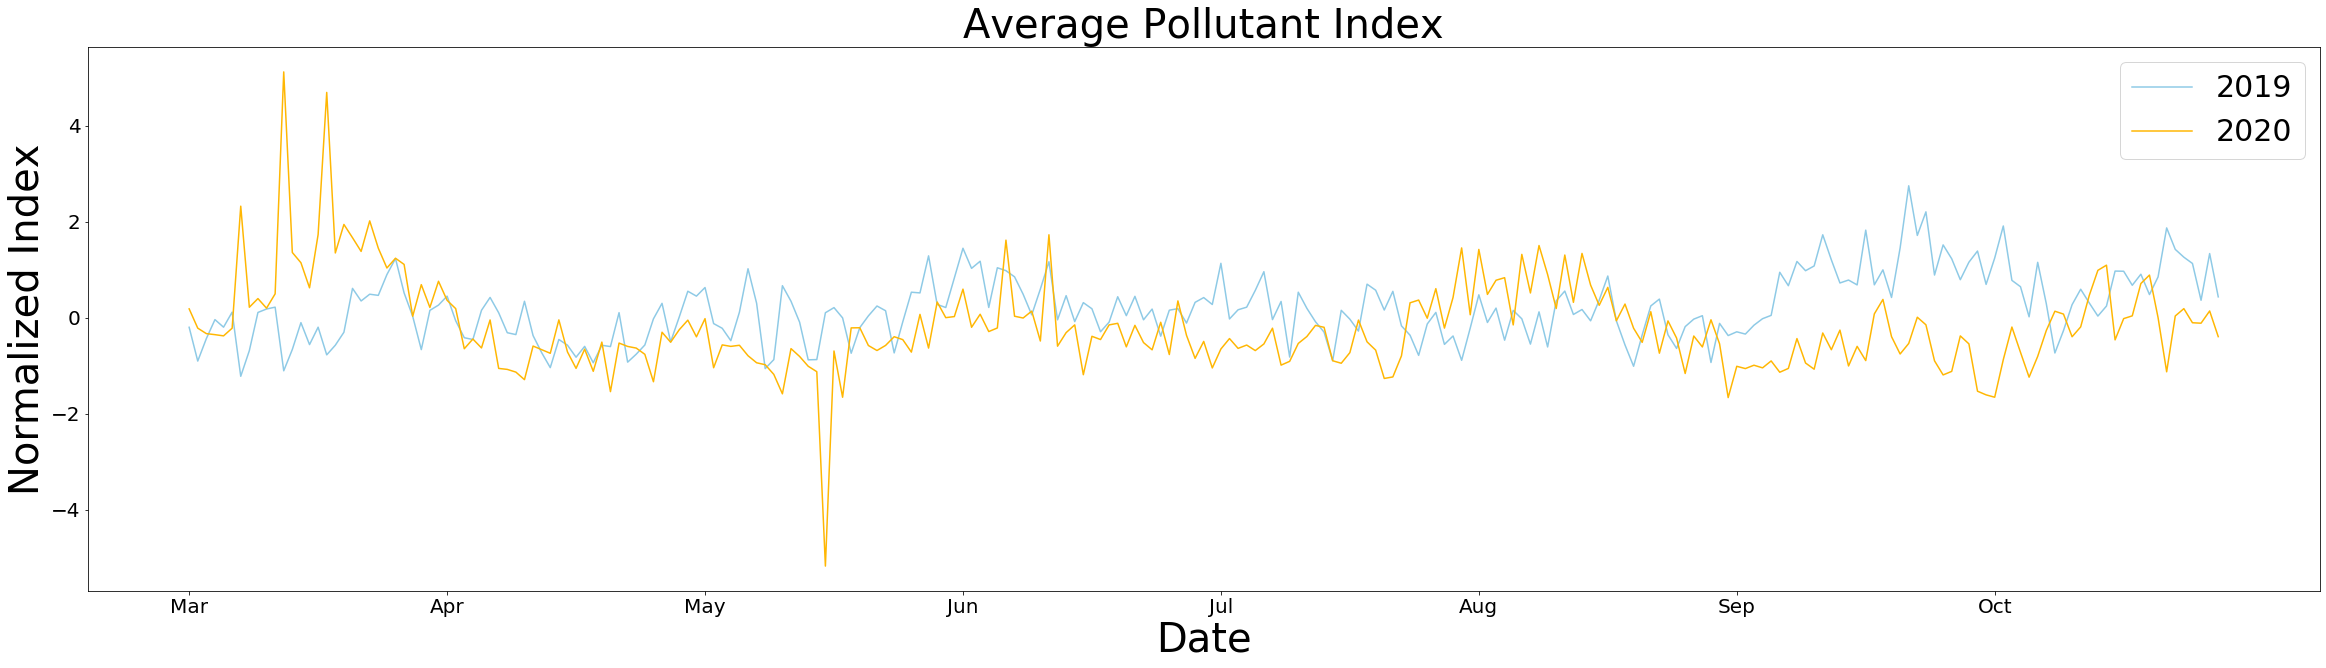

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
# plt.plot(features_2018[0]["Avg"],label = "2018")
plt.plot(standard_param_average[:237],label = "2019", color =  "#8ECAE6")
plt.plot(standard_param_average[237:], label = "2020", color = "#ffb703")
plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 40)
plt.ylabel("Normalized Index", fontsize = 40)
plt.title("Average Pollutant Index", fontsize = 40)
# ax.spines["right"].set_color("None")
plt.legend(fontsize = 30)
plt.show()

In [44]:
from scipy import stats
stats.ttest_ind(standard_param_average[:237],standard_param_average[237:])

Ttest_indResult(statistic=5.183865007990148, pvalue=3.2287791907243763e-07)

D:\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:262: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
No handles with labels found to put in legend.


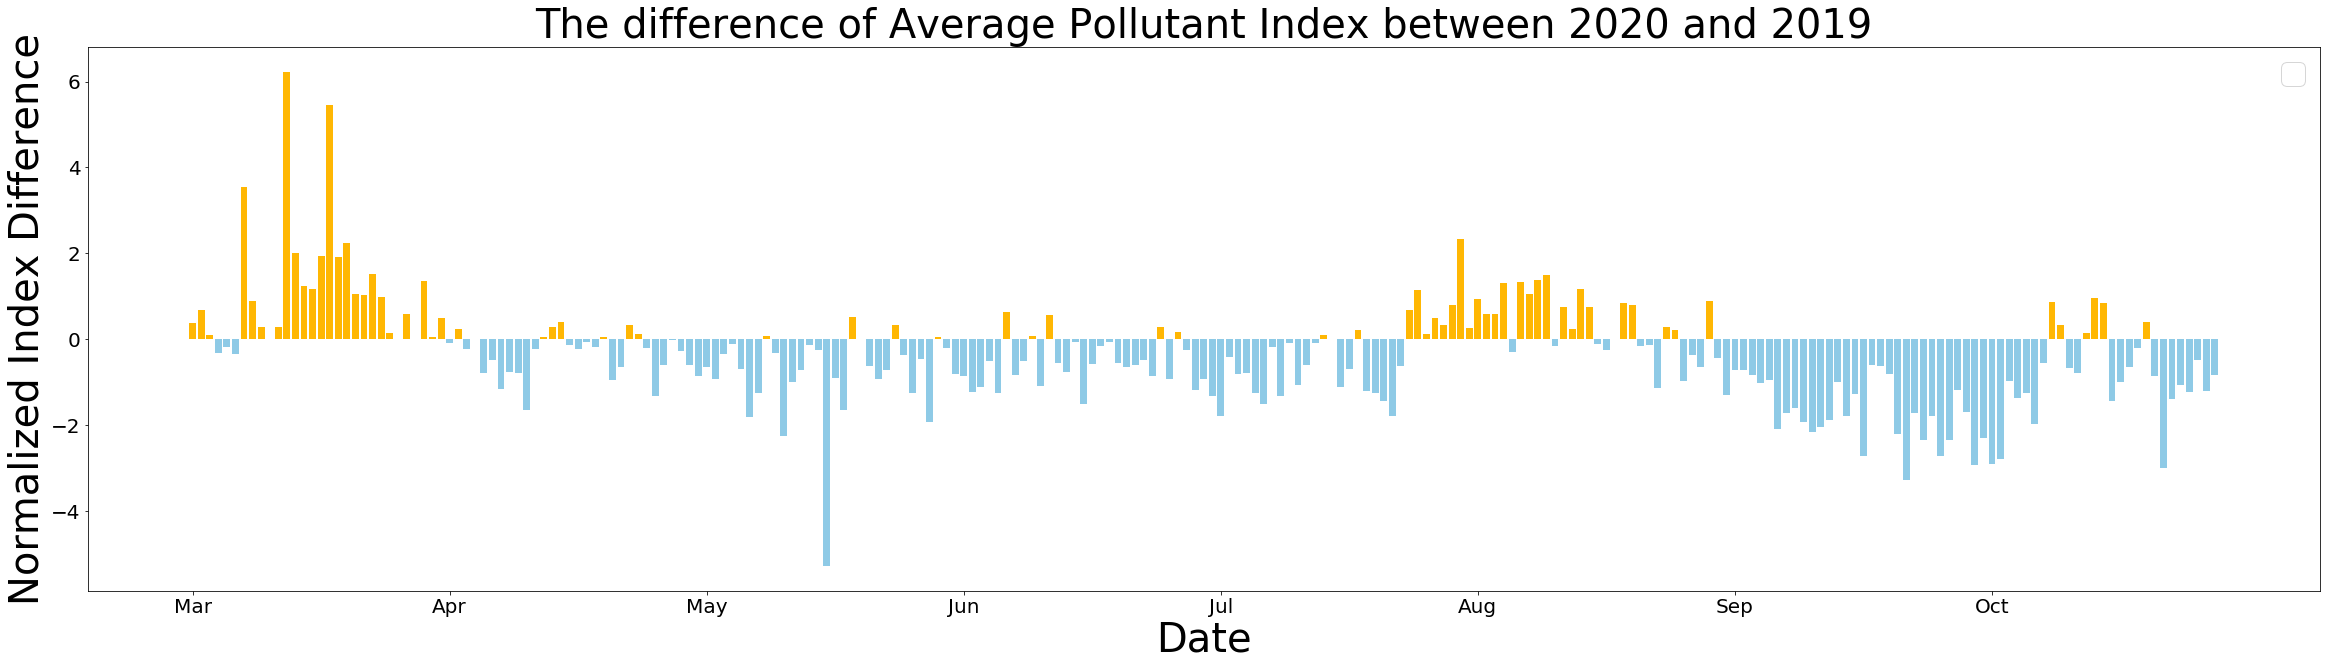

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
diff = np.array([data_2020 - data_2019 for data_2020, data_2019 in zip(standard_param_average[237:], standard_param_average[:237])])
x_range = np.arange(237)
above = np.ma.masked_array(diff, diff > 0)
below = np.ma.masked_array(diff, diff < 0)
plt.bar(x_range, above, color =  "#8ECAE6")
plt.bar(x_range, below, color = "#ffb703")
# plt.plot([0]*237, label = "baseline")
plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 40)
plt.ylabel("Normalized Index Difference", fontsize = 40)
plt.title("The difference of Average Pollutant Index between 2020 and 2019", fontsize = 40)
plt.legend(fontsize = 30)
plt.savefig("general_average_difference.png")
plt.show()

In [ ]:
sns.violinplot(x='sex', y='age', data=dataset, hue='survived')

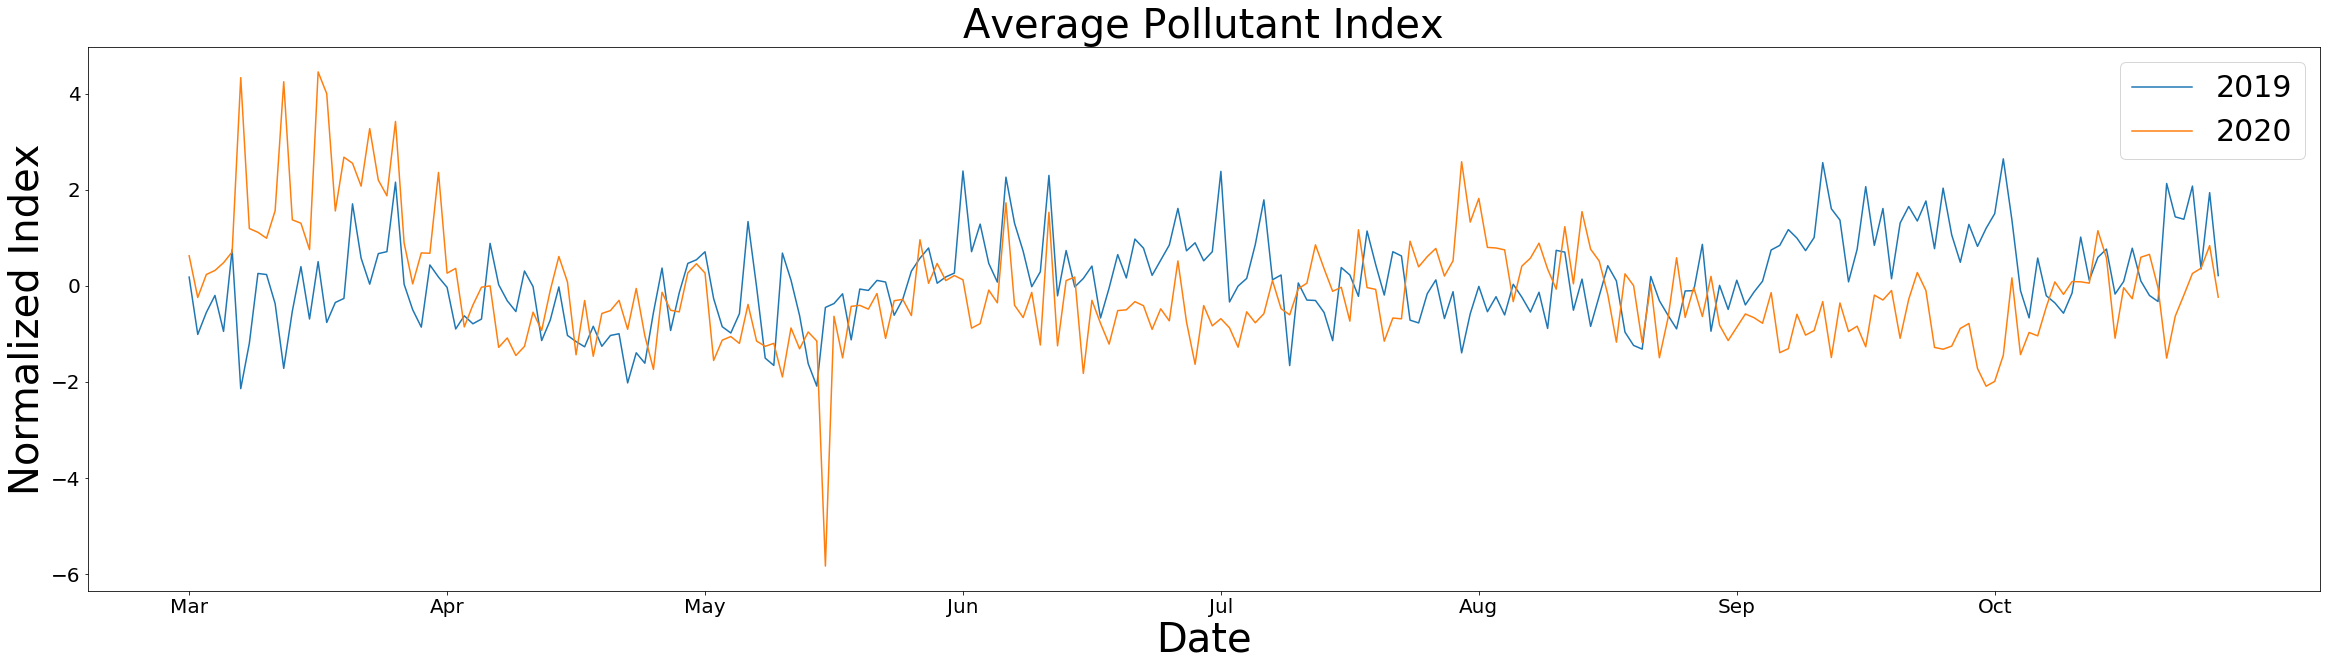

In [206]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.plot(standard_param_max[:237],label = "2019")
plt.plot(standard_param_max[237:], label = "2020")
plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 40)
plt.ylabel("Normalized Index", fontsize = 40)
plt.title("Average Pollutant Index", fontsize = 40)
plt.legend(fontsize = 30)
plt.show()

No handles with labels found to put in legend.


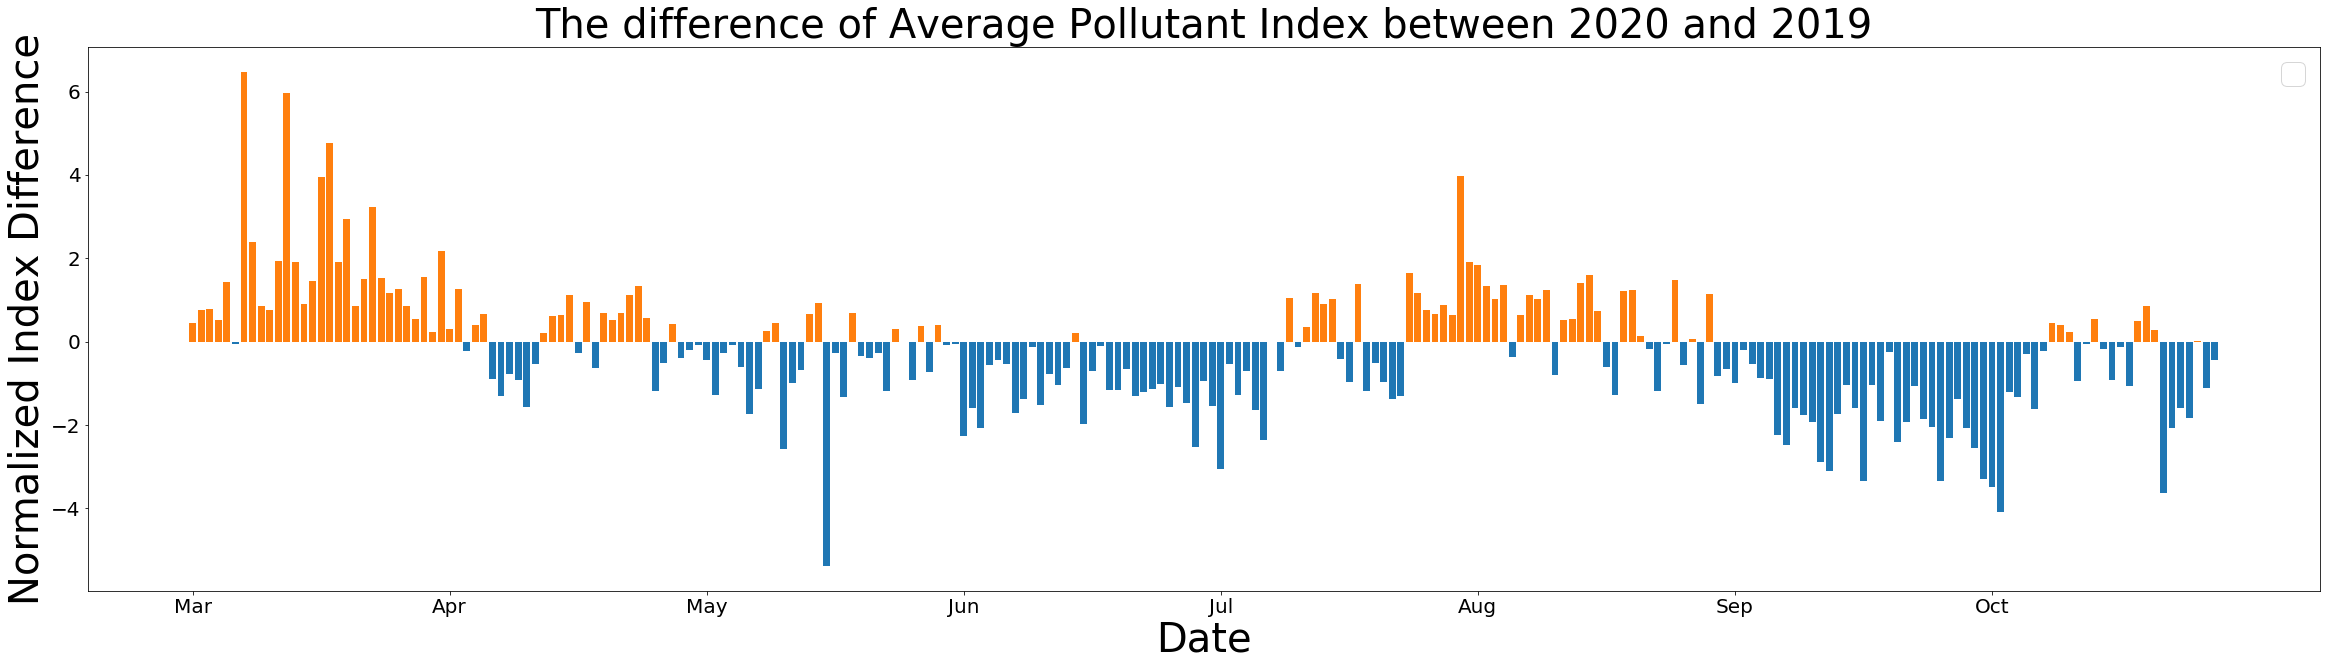

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
diff = np.array([data_2020 - data_2019 for data_2020, data_2019 in zip(standard_param_max[237:], standard_param_max[:237])])
x_range = np.arange(237)
above = np.ma.masked_array(diff, diff > 0)
below = np.ma.masked_array(diff, diff < 0)
plt.bar(x_range, above)
plt.bar(x_range, below)
# plt.plot([0]*237, label = "baseline")
plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 40)
plt.ylabel("Normalized Index Difference", fontsize = 40)
plt.title("The difference of Average Pollutant Index between 2020 and 2019", fontsize = 40)
plt.legend(fontsize = 30)
plt.show()

<font size = 5> ANOVA Test

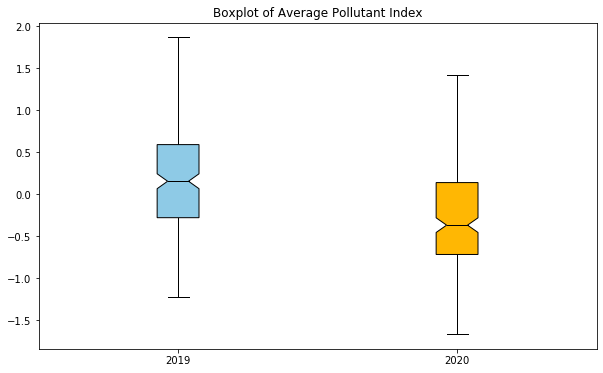

In [73]:
import matplotlib.pyplot as plt
data = [standard_param_average[:237], standard_param_average[237:]]
plt.figure(figsize=(10,6))
box = plt.boxplot(data, showfliers = False, notch=True, patch_artist=True, medianprops=dict(color="black"))
colors = ["#8ECAE6", "#ffb703"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(np.arange(1,3), ["2019","2020"])
plt.title('Boxplot of Average Pollutant Index')
plt.savefig("box_general_average.png")
plt.show()

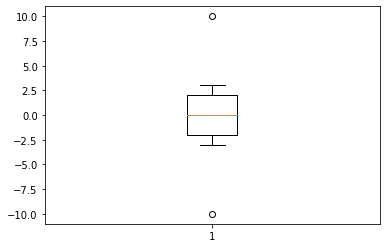

In [70]:
x = [-10, -3, -2, -1, 0, 1, 2, 3, 10]

plt.boxplot(x)

plt.show()

In [217]:
from scipy.stats import f_oneway
f_oneway(standard_param_average[:237], standard_param_average[237:])

F_onewayResult(statistic=26.87245642106469, pvalue=3.2287791907238776e-07)

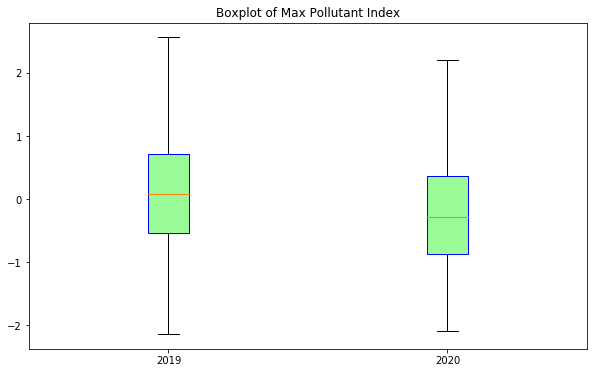

In [273]:
data = [standard_param_max[:237], standard_param_max[237:]]
plt.figure(figsize=(10,6))
plt.boxplot(data,showfliers = False, patch_artist=True, boxprops=dict(facecolor = "PaleGreen",color= "blue"))
plt.xticks(np.arange(1,3), ["2019","2020"])
plt.title('Boxplot of Max Pollutant Index')
plt.show()

In [218]:
f_oneway(standard_param_max[:237], standard_param_max[237:])

F_onewayResult(statistic=6.537121799544409, pvalue=0.010876402578670251)

<font size = 5> Comparision by Differenct Site

In [126]:
site_names = ['CHULA VISTA', 'EL CAJON LES','KEARNY MESA','OTAY MESA DVN','DOWNTOWN']
colors = ["#8ECAE6","#219EBC", "#023047", "#ffb703","#FB8500"]

In [123]:
standard_param_average_sites = {key : [] for key in site_names}
for index, param in enumerate(data_by_site_average):
    if index == 0:
        for index2, data in enumerate(data_by_site_average[param]):
            standard_param_average_sites[site_names[index2 % 5]].append((data - averages_average[index]) / (std_average[index] * 10))
    else:
        for index2, data in enumerate(data_by_site_average[param]):
            standard_param_average_sites[site_names[index2 % 5]][index2 // 5] += ((data - averages_average[index]) / (std_average[index] * 10))
len(standard_param_average_sites)

5

In [77]:
len(standard_param_average_sites['CHULA VISTA'])

474

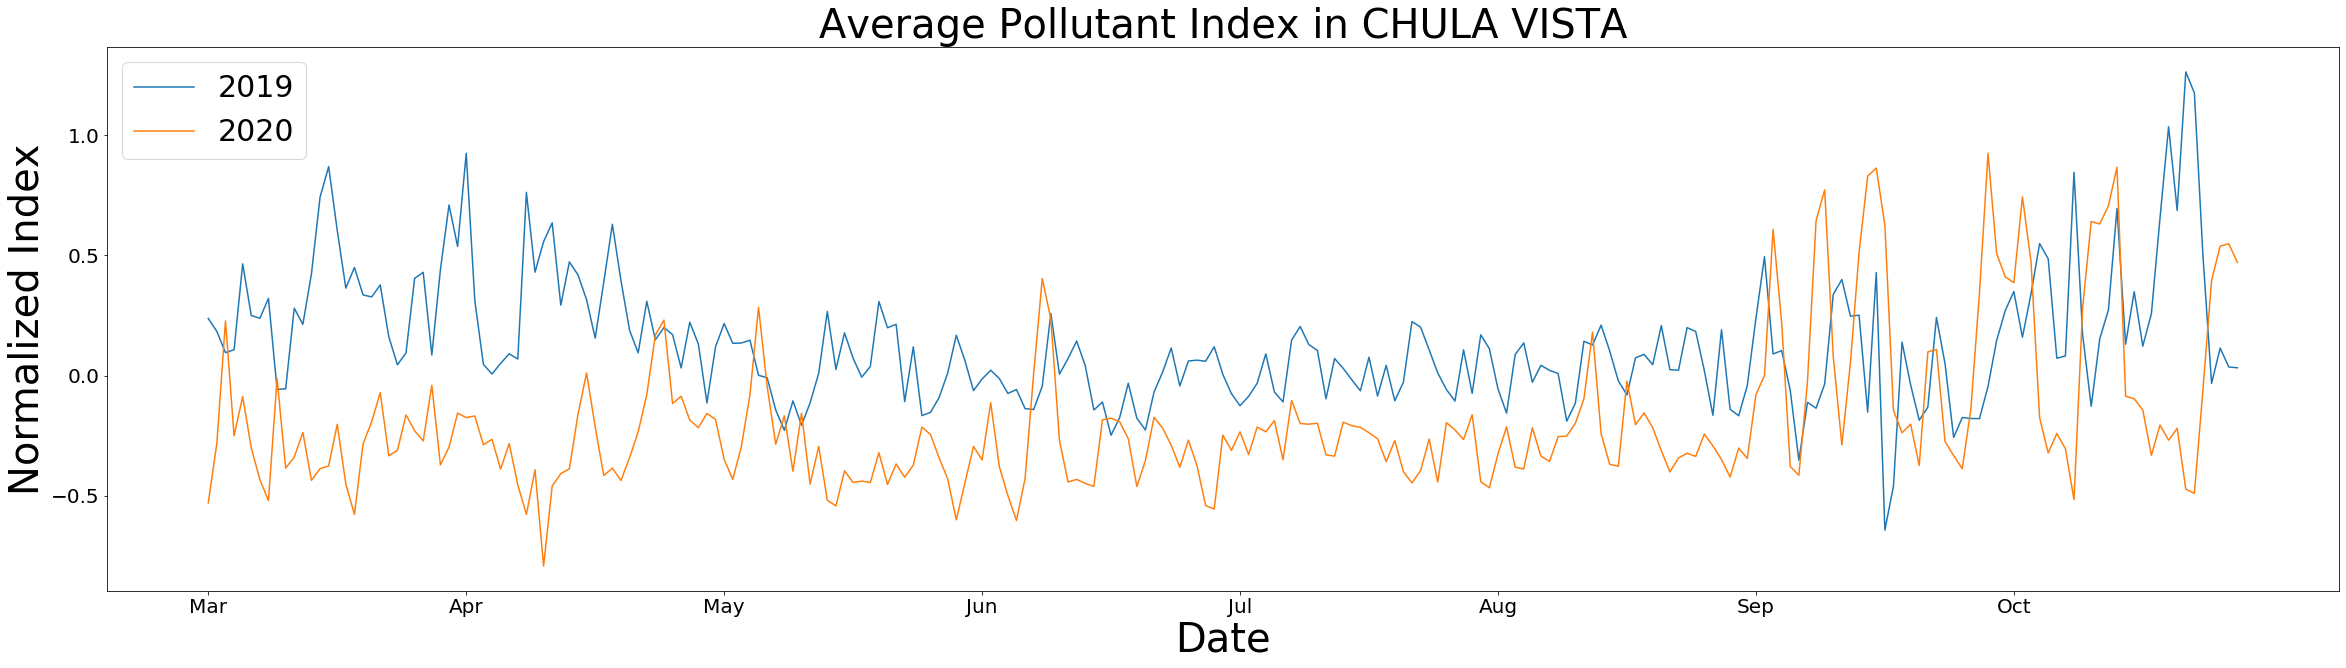

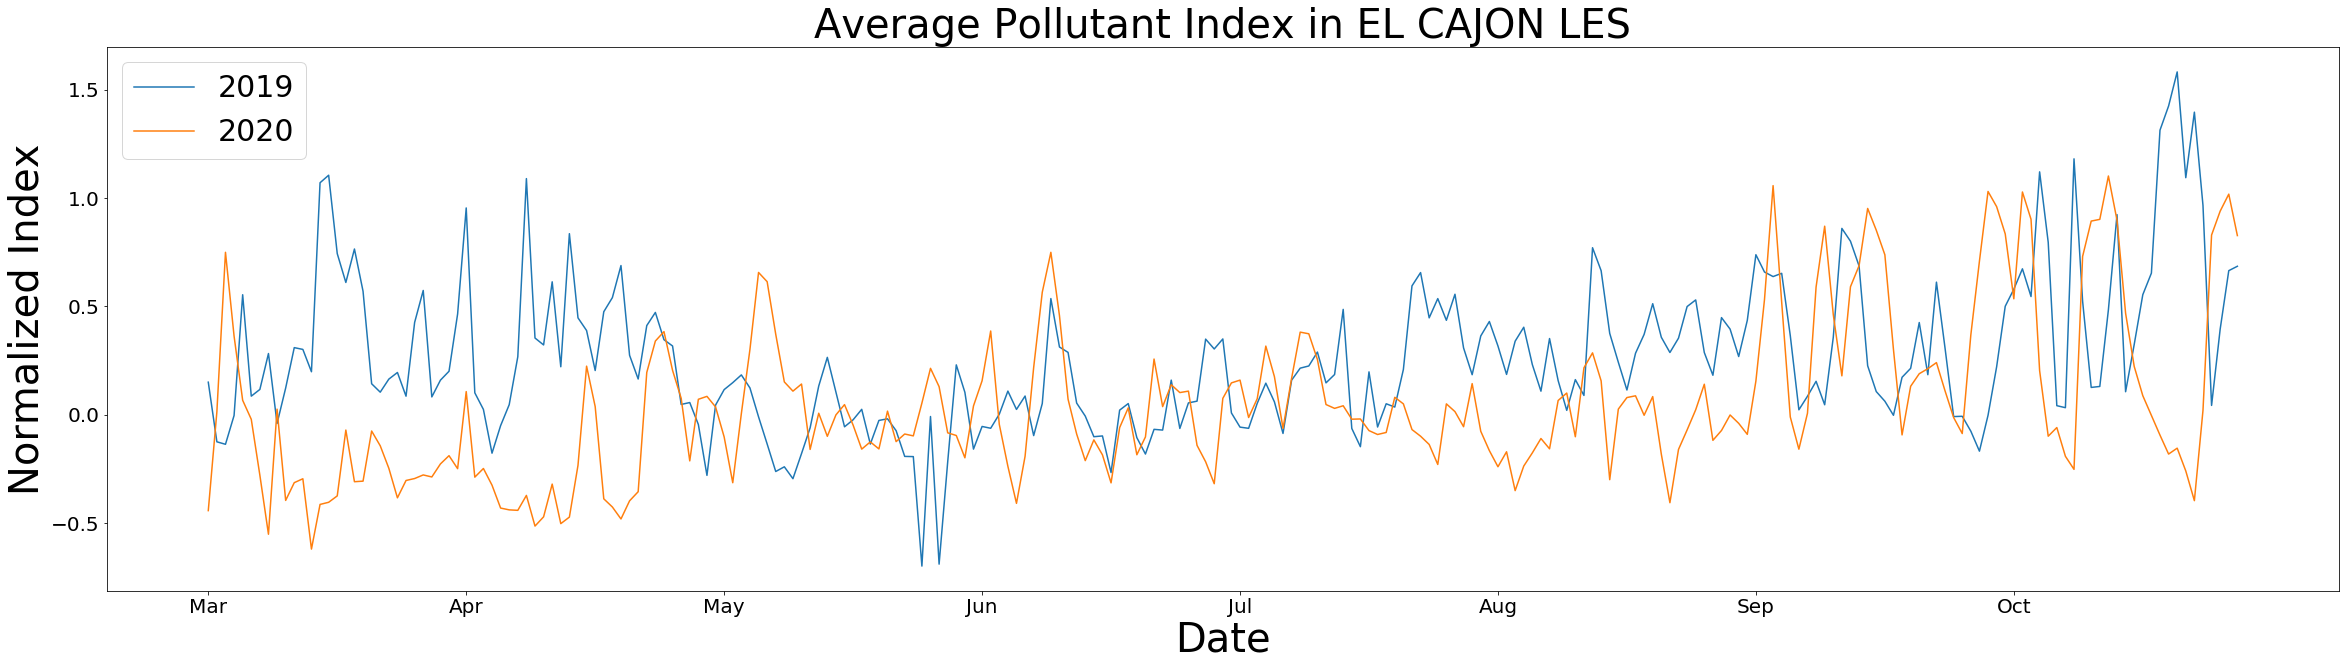

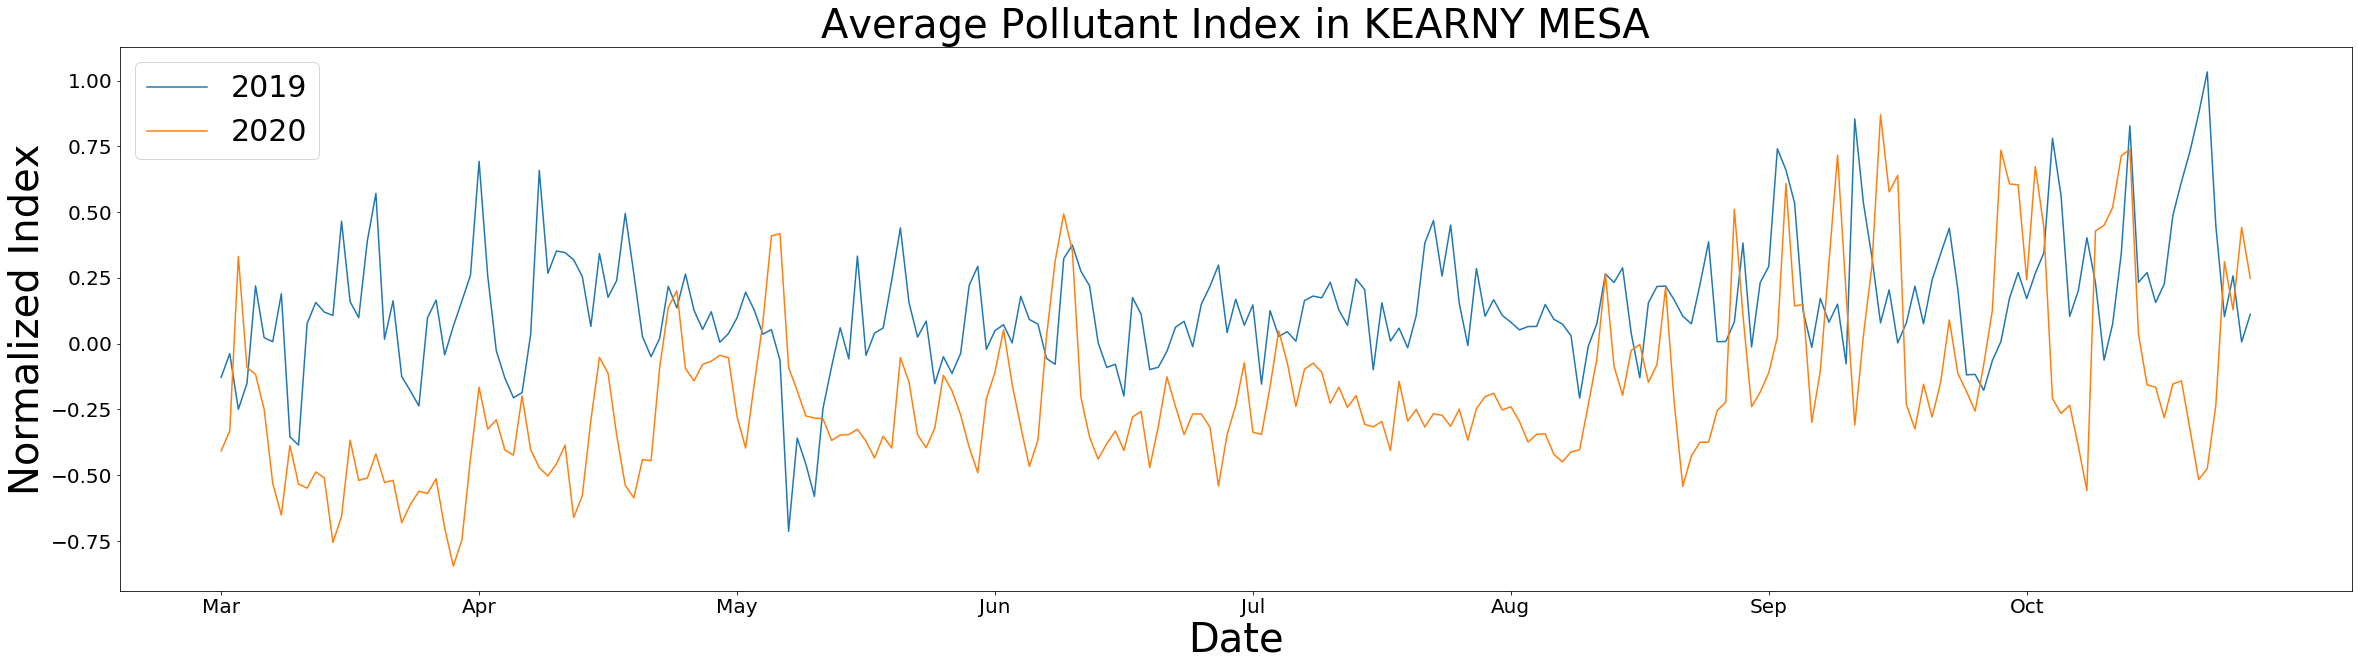

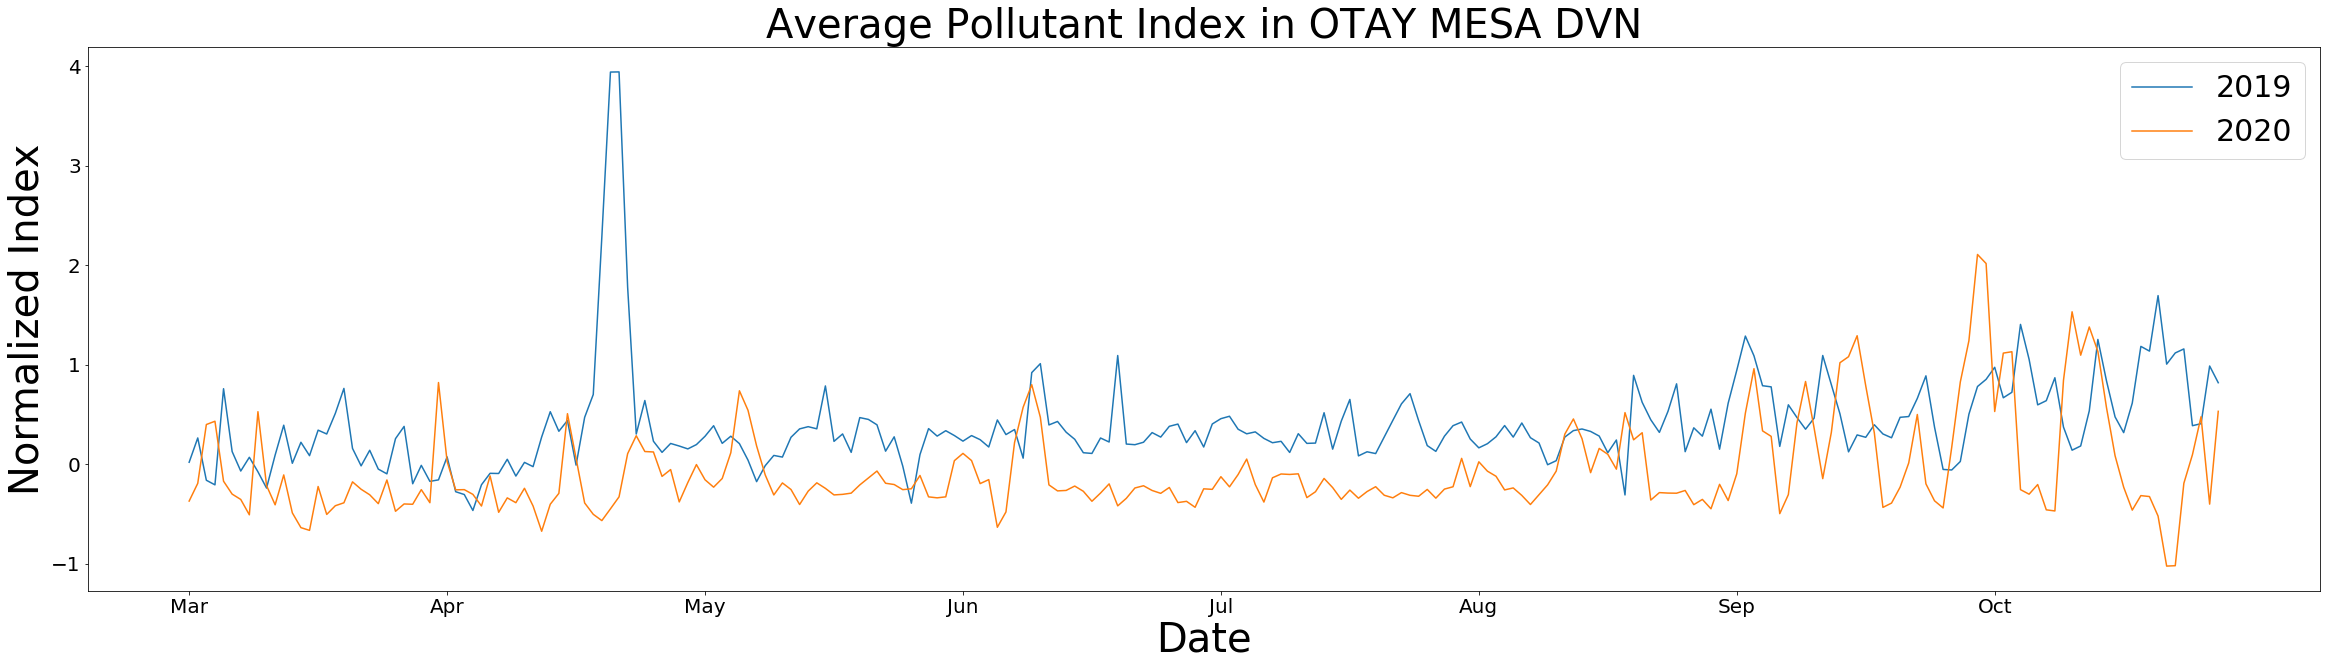

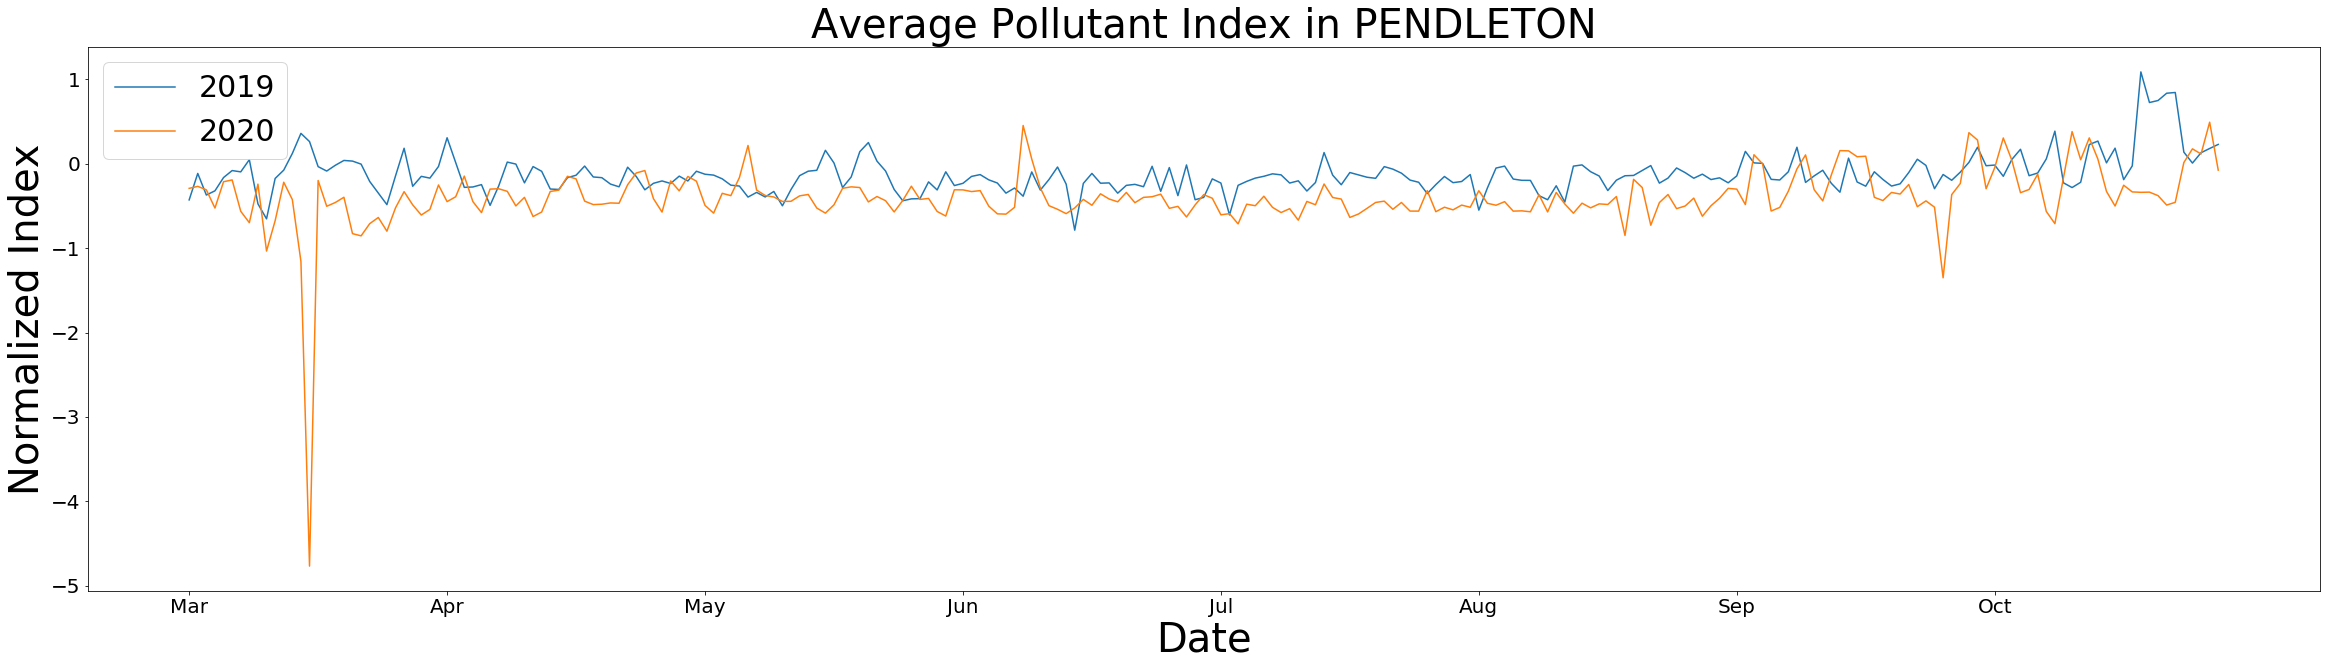

In [243]:
for i in range(5):
    plt.figure(figsize=(40,10))
    plt.plot(standard_param_average_sites[site_names[i]][:237],label = 2019)
    plt.plot(standard_param_average_sites[site_names[i]][237:],label = 2020)
    plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel("Date", fontsize = 40)
    plt.ylabel("Normalized Index", fontsize = 40)
    plt.title("Average Pollutant Index in %s" % site_names[i], fontsize = 40)
    plt.legend(fontsize = 30)
    plt.show()

No handles with labels found to put in legend.


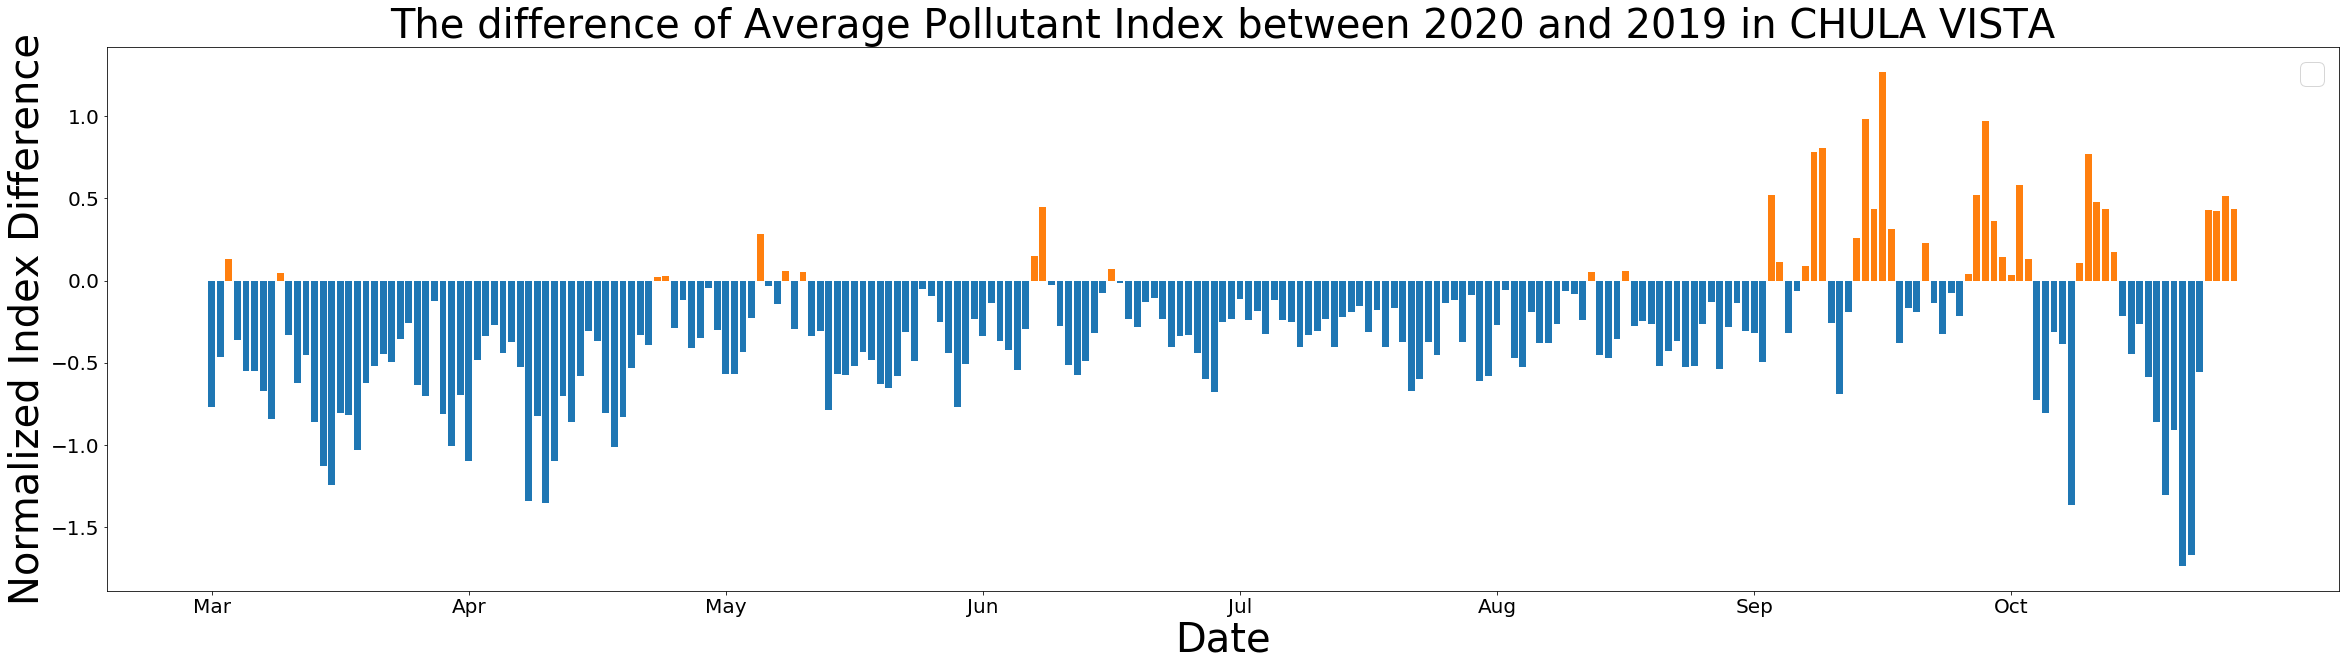

No handles with labels found to put in legend.


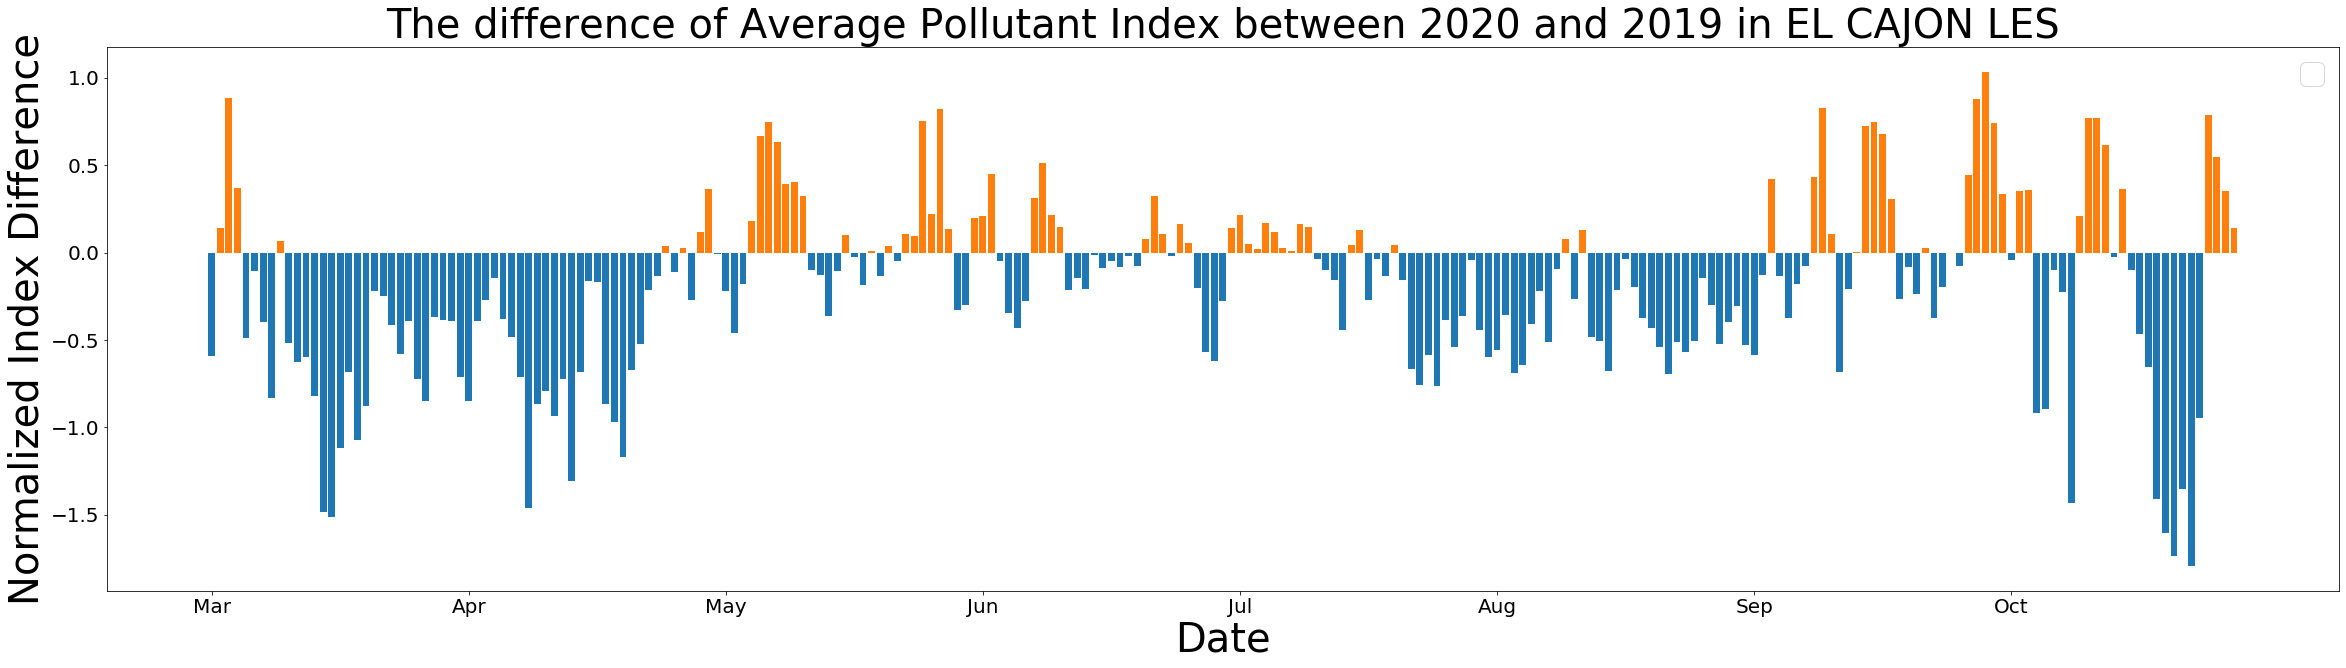

No handles with labels found to put in legend.


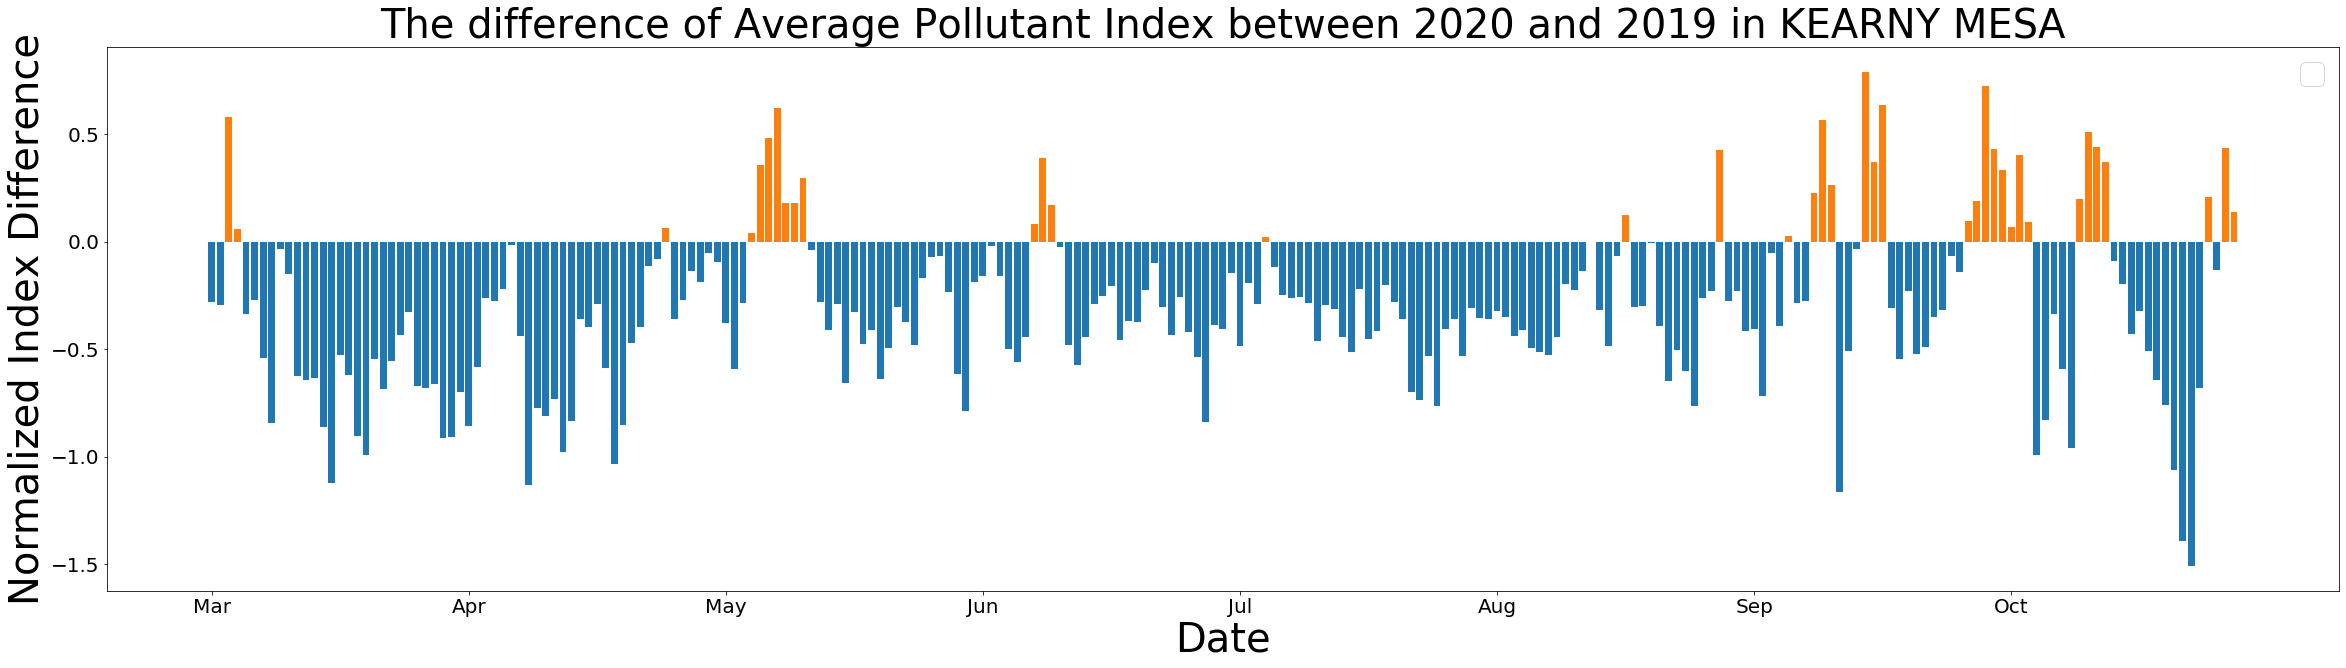

No handles with labels found to put in legend.


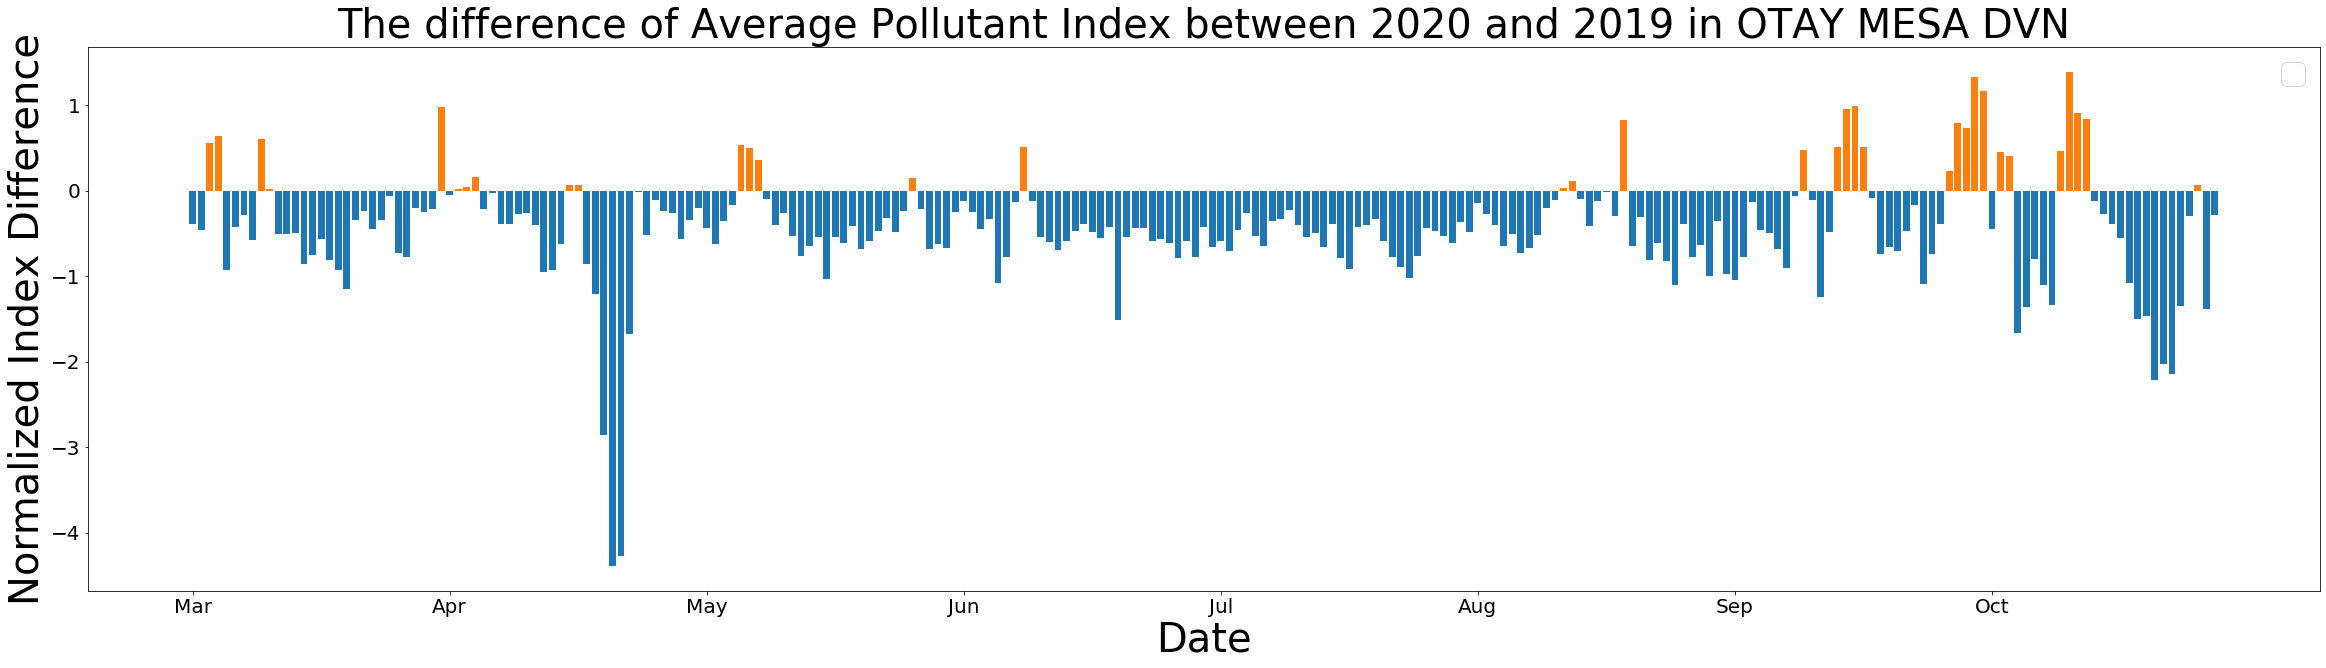

No handles with labels found to put in legend.


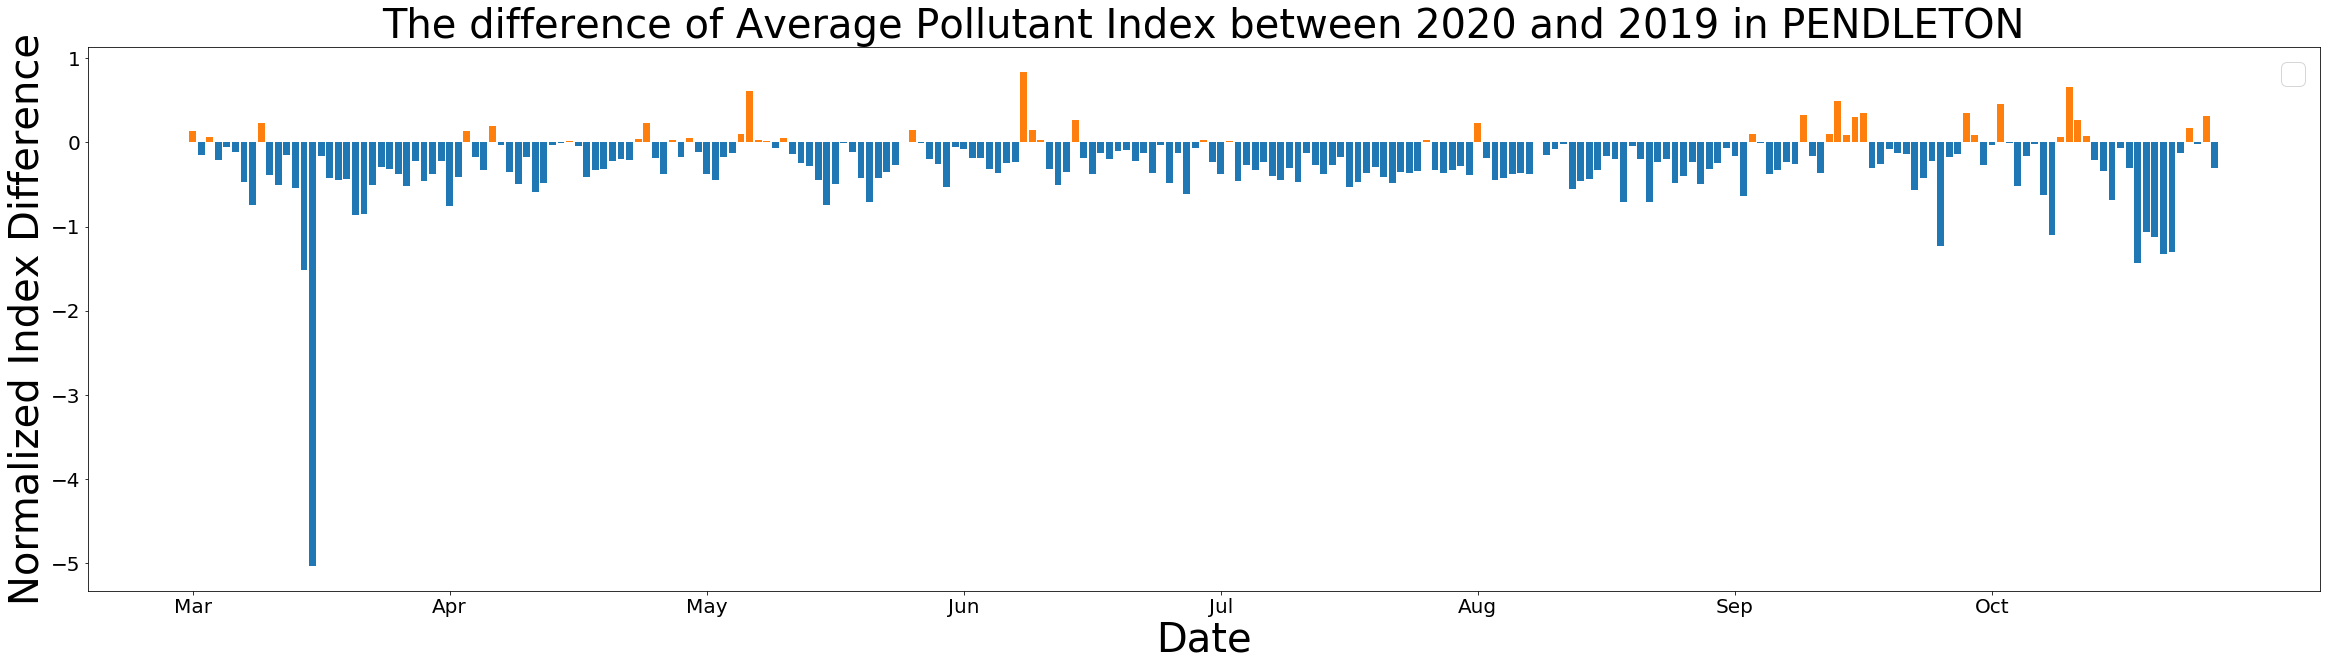

In [280]:
for i in range(5):
    plt.figure(figsize=(40,10))
    diff = np.array([data_2020 - data_2019 for data_2020, data_2019 in zip(standard_param_average_sites[site_names[i]][237:], standard_param_average_sites[site_names[i]][:237])])
    x_range = np.arange(237)
    above = np.ma.masked_array(diff, diff > 0)
    below = np.ma.masked_array(diff, diff < 0)
    plt.bar(x_range, above)
    plt.bar(x_range, below)
    plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel("Date", fontsize = 40)
    plt.ylabel("Normalized Index Difference", fontsize = 40)
    plt.title("The difference of Average Pollutant Index between 2020 and 2019 in %s" % site_names[i], fontsize = 40)
    plt.legend(fontsize = 30)
    plt.savefig("difference_%s.png" % site_names[i])
    plt.show()

<font size = 5> Which Area have the best Air Quality after Covid-19 Breakout?

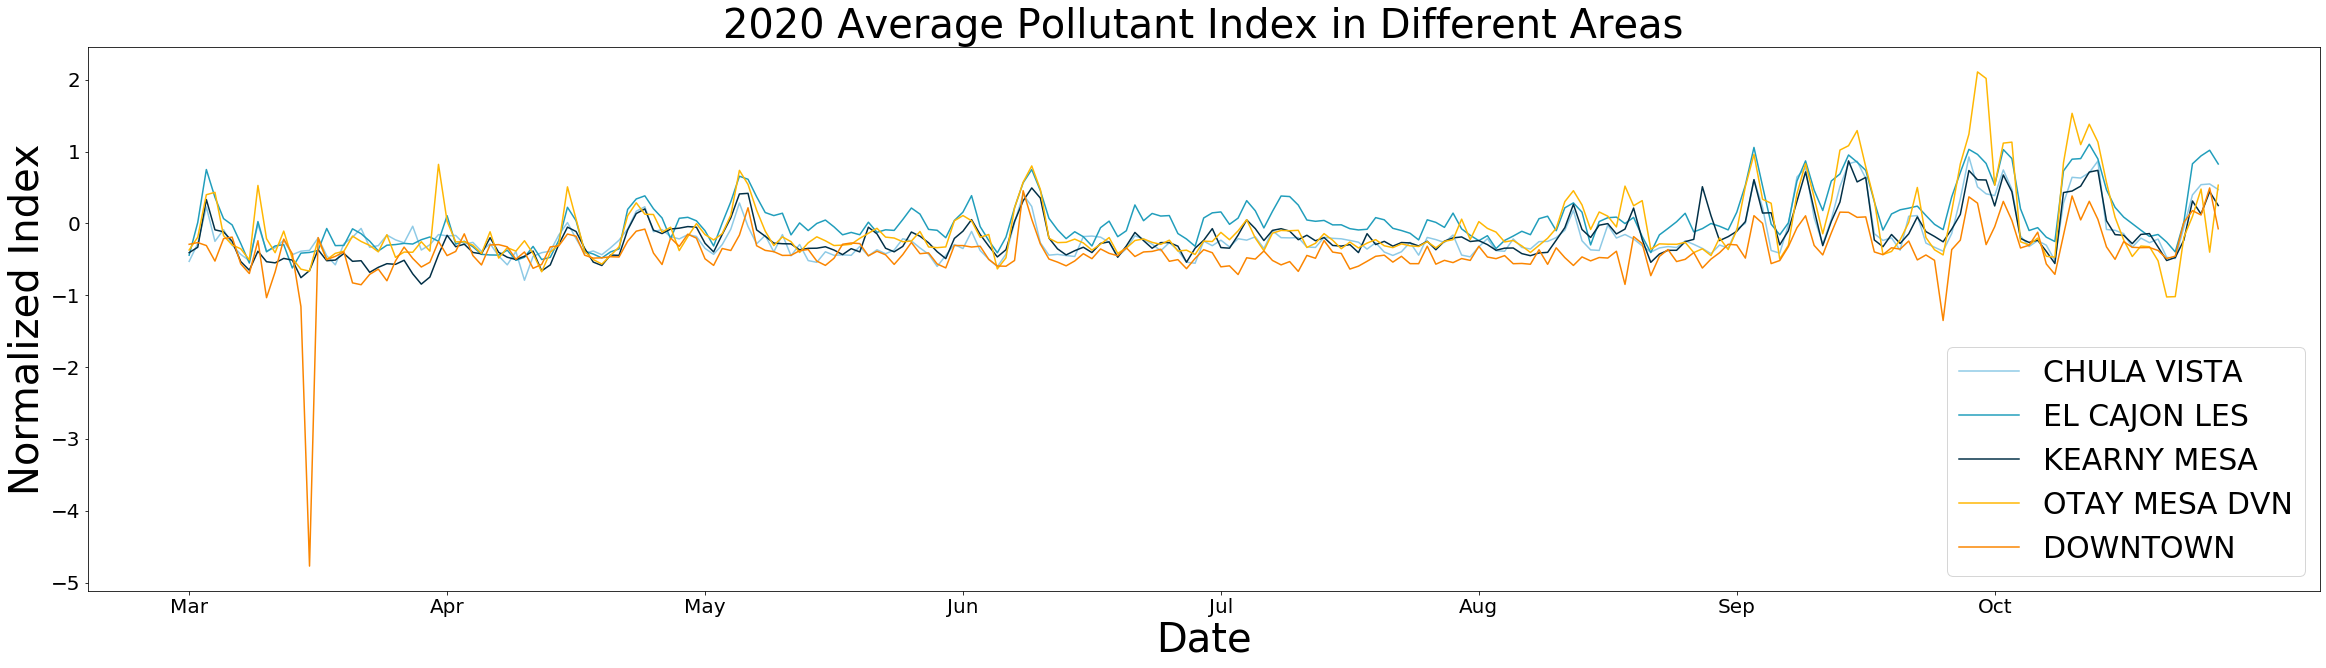

In [127]:
plt.figure(figsize=(40,10))
for i in range(5):
    plt.plot(standard_param_average_sites[site_names[i]][237:],label = site_names[i], color = colors[i] )
plt.xticks(np.arange(0, 237, step=30), ["Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"],fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Date", fontsize = 40)
plt.ylabel("Normalized Index", fontsize = 40)
plt.title("2020 Average Pollutant Index in Different Areas" , fontsize = 40)
plt.legend(fontsize = 30)
plt.savefig("AQI_areas.png")
plt.show()

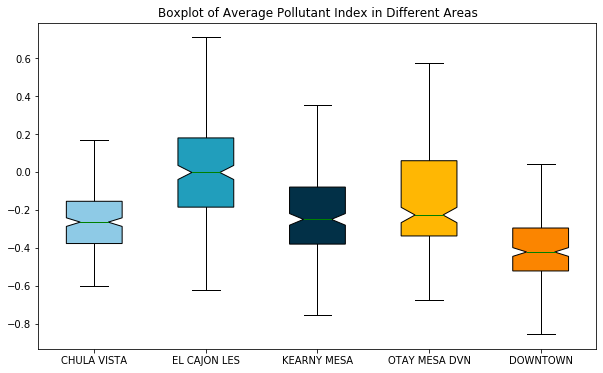

In [124]:
data = [standard_param_average_sites[site_names[i]][237:] for i in range(5)]
plt.figure(figsize=(10,6))
box = plt.boxplot(data, showfliers = False, notch=True, patch_artist=True, medianprops=dict(color="green"))
colors = ["#8ECAE6","#219EBC", "#023047", "#ffb703","#FB8500"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks(np.arange(1,6), site_names)
plt.title('Boxplot of Average Pollutant Index in Different Areas')
plt.savefig("Box_AQI_areas.png")
plt.show()

In [86]:
from scipy.stats import f_oneway
for i in range(5):
    for j in range(len(data[i])):
        if data[i][j] is None:
            data[i][j] = 0

In [93]:
f_onewaydata[0], data[1], data[2], data[3], data[4]

F_onewayResult(statistic=47.824518923917594, pvalue=2.6500774846922455e-37)

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [110]:
data = sum(data, [])
labels = [[site_names[i]] * 237 for i in range(5)]
labels = sum(labels, [])

In [111]:
len(data)

1185

In [114]:
print(pairwise_tukeyhsd(data, labels))

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
  CHULA VISTA  EL CAJON LES   0.2372  0.001  0.1437  0.3307   True
  CHULA VISTA   KEARNY MESA    0.003    0.9 -0.0904  0.0965  False
  CHULA VISTA OTAY MESA DVN   0.1205 0.0041   0.027   0.214   True
  CHULA VISTA     PENDLETON  -0.2134  0.001 -0.3069   -0.12   True
 EL CAJON LES   KEARNY MESA  -0.2341  0.001 -0.3276 -0.1406   True
 EL CAJON LES OTAY MESA DVN  -0.1167 0.0061 -0.2102 -0.0232   True
 EL CAJON LES     PENDLETON  -0.4506  0.001 -0.5441 -0.3571   True
  KEARNY MESA OTAY MESA DVN   0.1175 0.0056   0.024  0.2109   True
  KEARNY MESA     PENDLETON  -0.2165  0.001   -0.31  -0.123   True
OTAY MESA DVN     PENDLETON   -0.334  0.001 -0.4274 -0.2405   True
------------------------------------------------------------------
